# Problem Statement
### Create a prediction model to estimate crop yields based on numerous agricultural variables. The dataset includes data on soil levels of nitrogen (N), phosphorus (P), and potassium (K), as well as temperature, humidity, pH, and rainfall. The goal is to create a machine learning model that properly predicts crop yield.

## Data Card

- N-ratio of Nitrogen content in soil (mg/l) (numeric)
- P-ratio of Phosphorus content in soil (mg/l) (numeric)
- k-ratio of Potassium content in soil (mg/l) (numeric)
- temperature-temperature in degree Celcius (numeric)
- humidity-relative humidity in % (numeric)
- ph-ph value of the soil (numeric)
- rainfall-rainfall in mm (numeric)
- label-type of crops (Target Variable) (Multiclass Classification) (object)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("crop.xls")

In [3]:
df.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
df.tail(15)

,N,P,K,temperature,humidity,ph,rainfall,label
2185,116,36,25,27.578476,58.525343,6.172090,156.681037,coffee
2186,107,38,29,26.650693,57.566957,6.351182,145.105065,coffee
2187,101,33,33,26.972516,62.018363,6.908671,142.861079,coffee
2188,107,31,31,23.171246,52.978412,6.766184,153.120164,coffee
2189,99,16,30,23.526521,65.443409,6.392792,186.172820,coffee
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee


In [5]:
df.shape

(2200, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Nitrogen (N):
- The average nitrogen level is 50.55, with a wide range (min: 0, max: 140).
- The majority of samples (75%) have nitrogen levels below 84.25.


Phosphorus (P):
- The average phosphorus level is 53.36, with variability (min: 5, max: 145).
- 75% of the samples have phosphorus levels below 68.


Potassium (K):
- The average potassium level is 48.15, with a broad range (min: 5, max: 205).
- 75% of the samples have potassium levels below 49.


Temperature:
- The average temperature is 25.62°C, ranging from a minimum of 8.83°C to a maximum of 43.68°C.
- The data has a moderate spread, with the middle 50% falling between 22.77°C and 28.56°C.


Humidity:
- The average humidity is 71.48%, showing variability (min: 14.26%, max: 99.98%).
- The majority of samples (75%) have humidity levels below 89.95%.


pH:
- The average pH is 6.47, with a relatively narrow range (min: 3.50, max: 9.94).
- The middle 50% of samples have pH values between 5.97 and 6.92.


Rainfall:
- The average rainfall is 103.46, varying widely (min: 20.21, max: 298.56).
- 75% of the samples have rainfall levels below 124.27.

In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [10]:
df.duplicated().value_counts()

False    2200
Name: count, dtype: int64

In [11]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Univariate Analysis

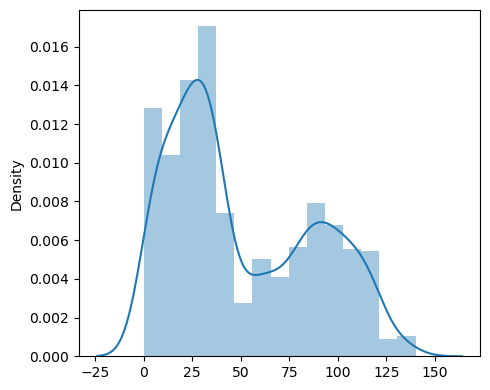

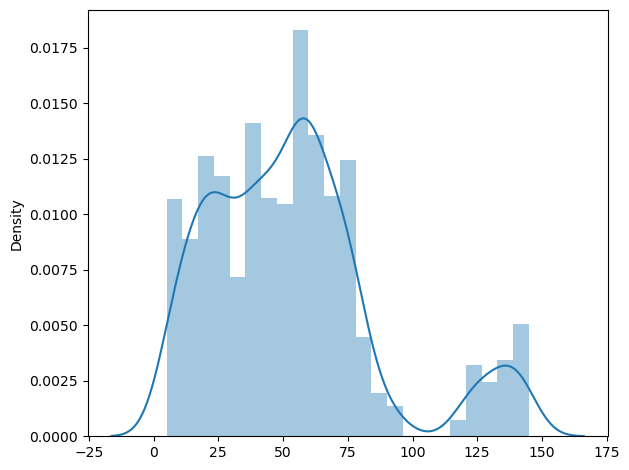

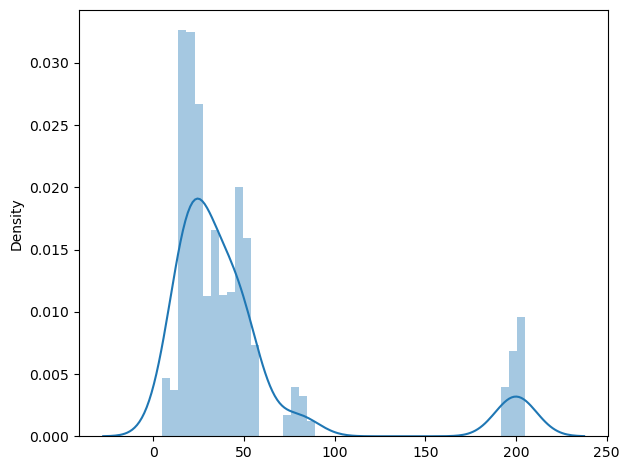

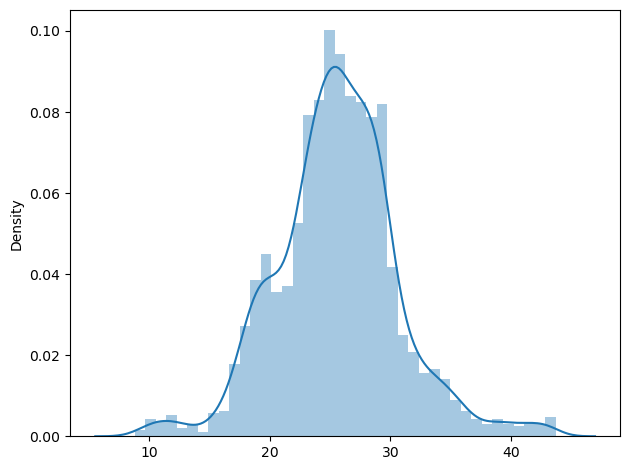

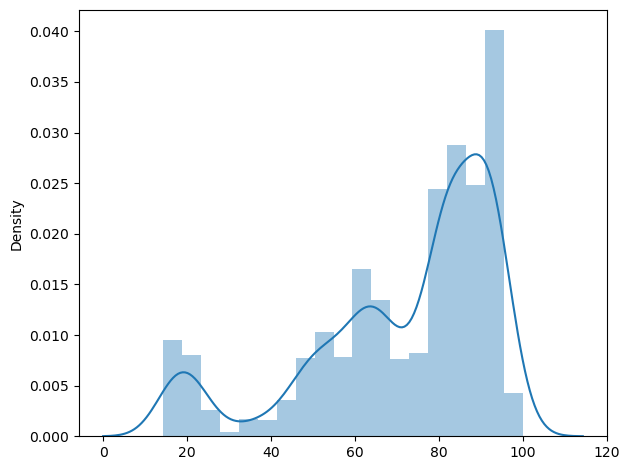

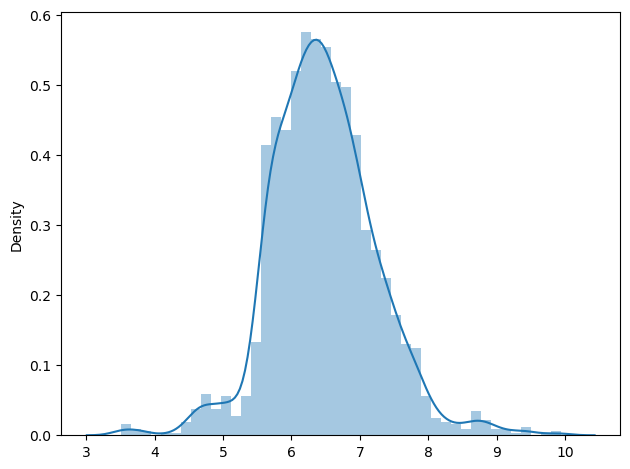

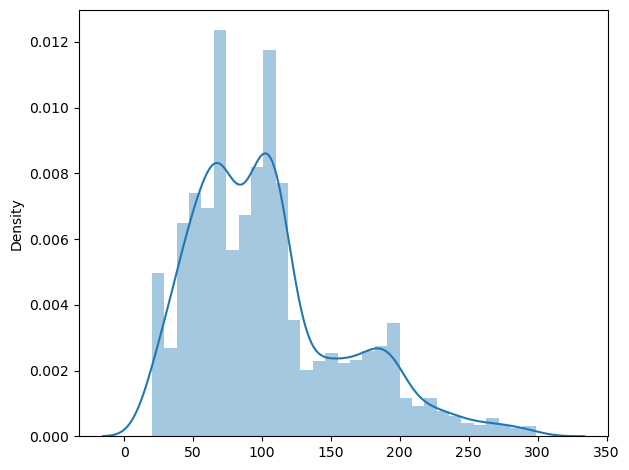

In [12]:
plt.figure(figsize=(5,4))

for i in df.select_dtypes(exclude='O'):
    sns.distplot(x=df[i])
    plt.tight_layout()
    plt.show()

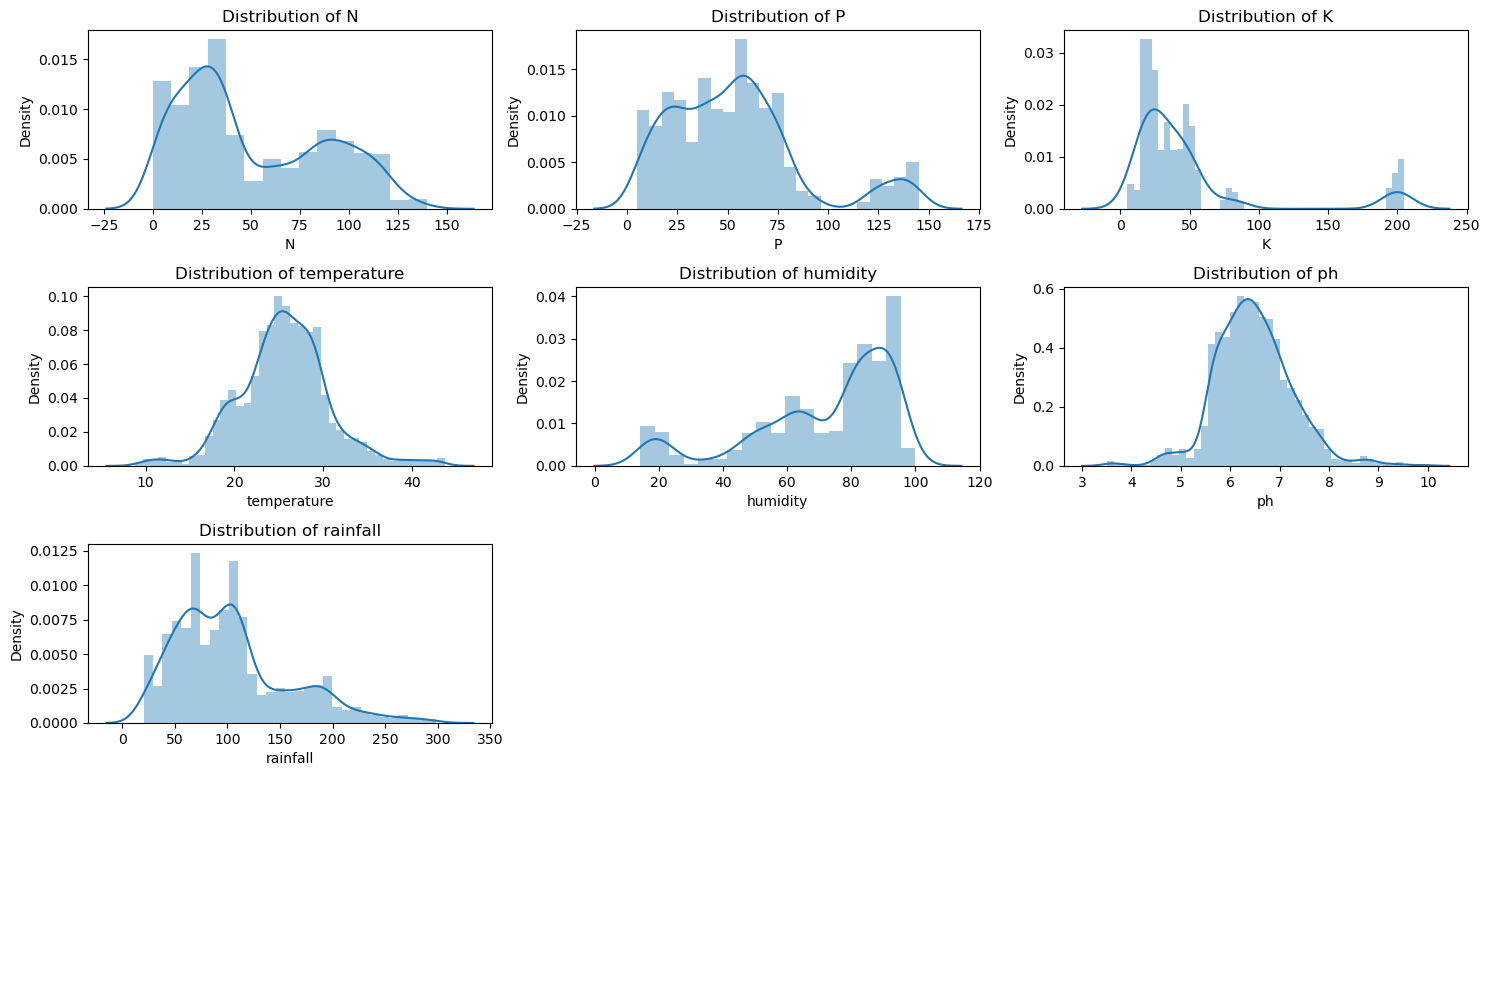

In [13]:
numerical_columns = df.select_dtypes(exclude='O').columns

# Calculate the number of rows and columns for subplots
num_rows = (len(numerical_columns)+1) // 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

#hide empty sublots
for j in range(i+1,len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


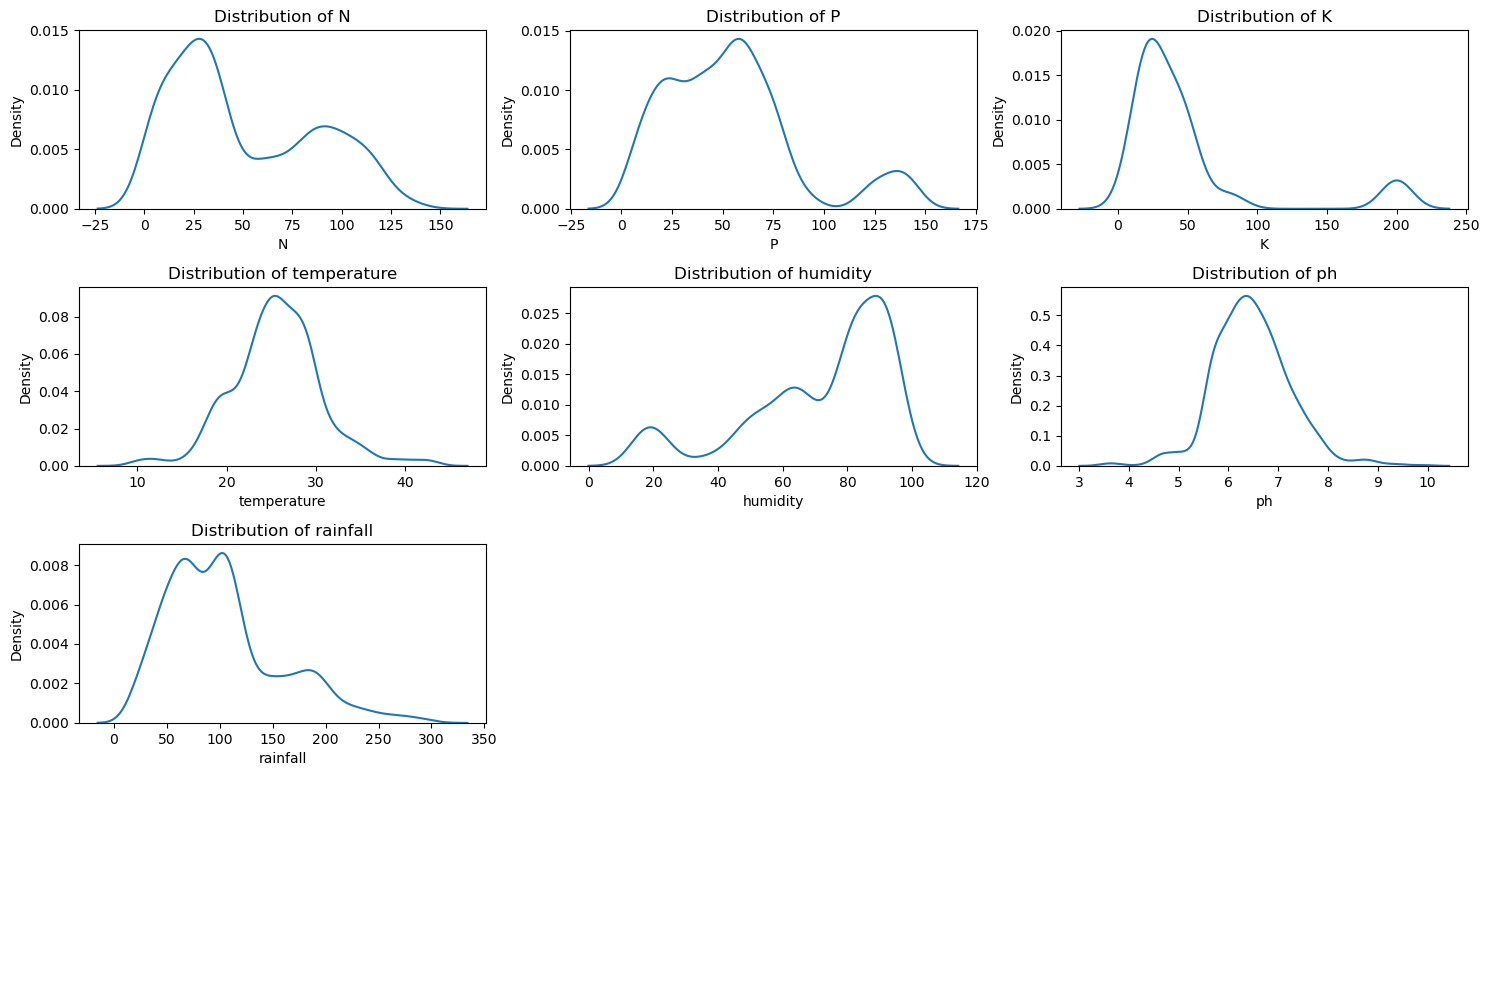

In [14]:
numerical_columns = df.select_dtypes(exclude='O').columns

# Calculate the number of rows and columns for subplots
num_rows = (len(numerical_columns)+1) // 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.distplot(df[col], ax=axes[i], hist=False)
    axes[i].set_title(f'Distribution of {col}')

#hide empty sublots
for j in range(i+1,len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
df[df['N']==0].count()

N              27
P              27
K              27
temperature    27
humidity       27
ph             27
rainfall       27
label          27
dtype: int64

In [16]:
df[df['temperature']==8.825].count()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [17]:
df['temperature'].mean()

25.616243851779544

<Axes: >

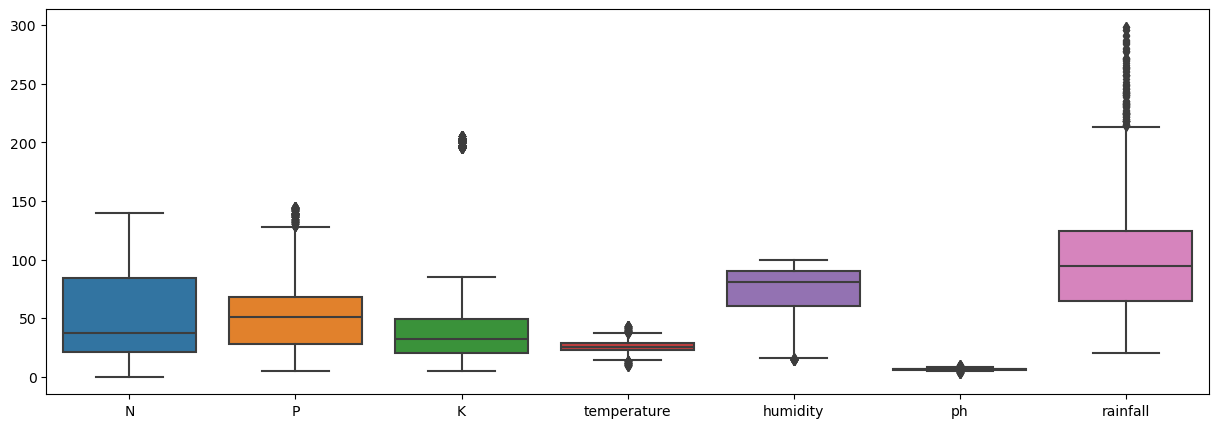

In [18]:
plt.figure(figsize=(15, 5))
plt.tight_layout()
sns.boxplot(df)

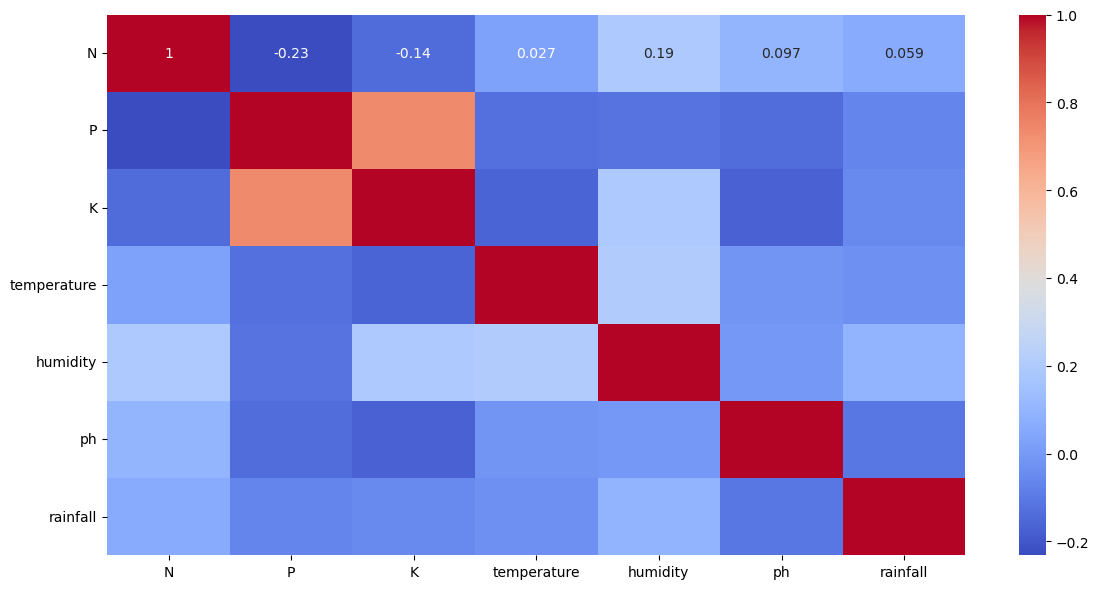

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.select_dtypes(exclude='O').corr(),annot=True,cmap="coolwarm")
plt.tight_layout()

In [20]:
#data preprocess
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
x=df[['N','P','K','temperature','humidity','ph','rainfall']]

In [21]:
le = LabelEncoder()
enc_col=le.fit_transform(df['label'])
print(enc_col)

[20 20 20 ...  5  5  5]


In [22]:
#feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.2)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

#we must apply the scaling to the test as well that we are computing for
x_test_scaled = scaler.transform(x_test)


In [23]:
x_train.shape

(1760, 7)

In [24]:
x_test.shape

(440, 7)

In [25]:
y.count

<bound method Series.count of 0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: target, Length: 2200, dtype: int8>

In [26]:
x.count

<bound method DataFrame.count of         N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]>

In [27]:
print(y_train.value_counts(normalize=True)*100,2)

target
20    4.943182
17    4.886364
3     4.829545
16    4.829545
12    4.715909
5     4.715909
4     4.659091
10    4.659091
1     4.659091
18    4.602273
21    4.602273
11    4.545455
9     4.545455
6     4.431818
2     4.431818
0     4.431818
19    4.375000
14    4.318182
13    4.318182
8     4.261364
15    4.204545
7     4.034091
Name: proportion, dtype: float64 2


In [28]:
stratify=y
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: target, Length: 2200, dtype: int8

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() 
knn.fit(x_train_scaled,y_train) 
c=knn.score(x_test_scaled,y_test)

d=knn.score(x_train_scaled,y_train) 
print(d) 
print(c)

0.9903409090909091
0.975


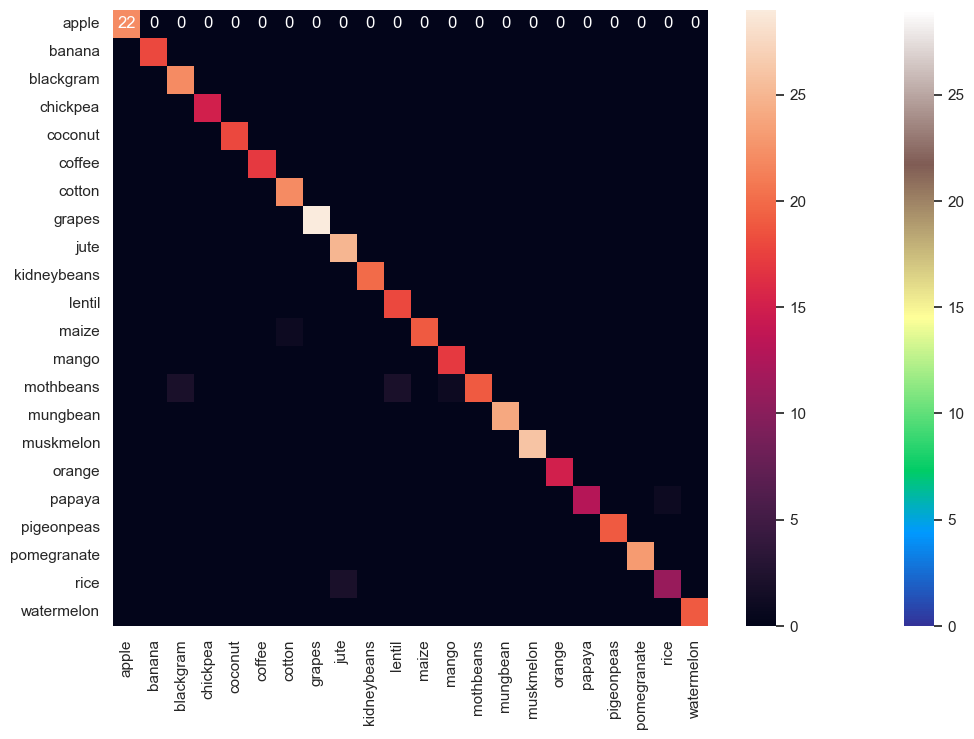

In [35]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap

# Make sure you have imported these libraries
mat = confusion_matrix(y_test, knn.predict(x_test_scaled))

# Create DataFrame for the confusion matrix
df_cm = pd.DataFrame(mat,list(targets.values()),list(targets.values()))

# Set font size for heatmap labels
sns.set(font_scale=1.0)  # Corrected typo (font_scale)

# Configure plot size
plt.figure(figsize=(12, 8))

# Create heatmap with annotations
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="terrain")
sns.heatmap(df_cm, xticklabels=True, yticklab
plt.show()  # Add plt.show() to display the heatmap

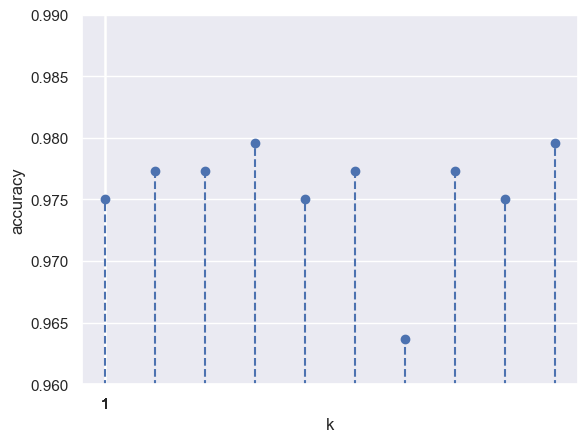

In [31]:
k_range=range(1,11)

scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(x_train_scaled, y_train)

    scores.append(knn.score(x_test_scaled, y_test))



plt.xlabel('k')

plt.ylabel('accuracy')

plt.scatter(k_range, scores)

plt.vlines(k_range, 0, scores, linestyle="dashed")

plt.ylim(0.96,0.99)

plt.xticks([1 for i in range(1,11)]);

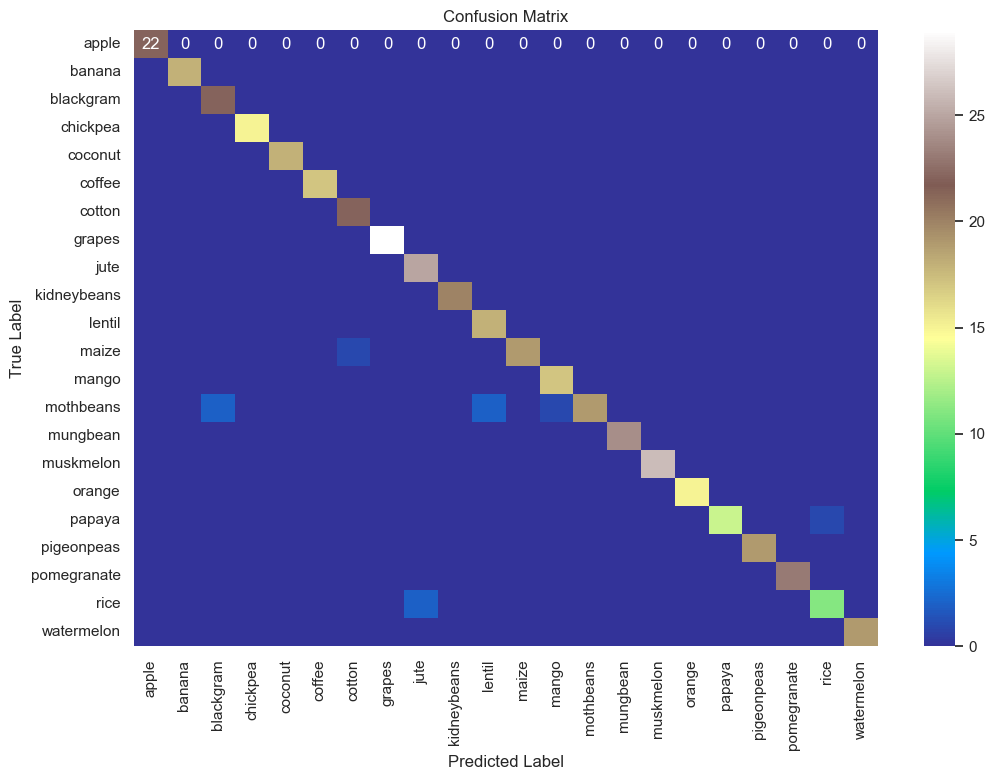

In [32]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
mat = confusion_matrix(y_test, knn.predict(x_test_scaled))

# Create DataFrame for the confusion matrix
df_cm = pd.DataFrame(mat, index=list(targets.values()), columns=list(targets.values()))

# Set font size for heatmap labels
sns.set(font_scale=1.0)

# Configure plot size
plt.figure(figsize=(12, 8))

# Create heatmap with annotations
sns.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 12}, cmap="terrain")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
